<a href="https://colab.research.google.com/github/18K41A0565/NNDL/blob/main/ASSIGNEMT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6
4,5,1.0,5.0


In [14]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [15]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [16]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [17]:
import sympy as sym
from sympy import *
import random

#step 1 Initialization
mi=1 #model parameters
ci=-1
lr = 0.1  #learning rate
epochs = 850#maximum iterations
iter = 0
nsi = len(x_train)

while iter<epochs: #step 7 check for convergence criteria
  #step 2: start the iter and update while the loop 
  iter = iter+1
  print("ITERATION {}".format(iter))
  
  #step 3: Error function for Gradient descent
  #declare the variables that you will be using in the error function
  x=sym.Symbol('x')
  y=sym.Symbol('y')
  m=sym.Symbol('m')
  c=sym.Symbol('c')
  ns = sym.Symbol('ns')
  E=(0.5)/ns*(y-m*x-c)**2  #ERROR FUNCTION
 

  derivE_m=sym.diff(E,m) #differentiation of E wrto m
  derivE_c=sym.diff(E,c)  #differentiate E wrto c
  #print(derivE_m)
  #print(derivE_c)
  #print('after subs m and c')
  #print('in derivE_m')
  derivE_m = derivE_m.subs(m, mi) 
  derivE_m = derivE_m.subs(c, ci)
  #print(derivE_m)
  #print('in derivE_c')
  derivE_c = derivE_c.subs(m, mi) 
  derivE_c = derivE_c.subs(c, ci)
  #print(derivE_c)
  #print('after substitution ns value')
  derivE_m = derivE_m.subs(ns,nsi)
  derivE_c = derivE_c.subs(ns,nsi)
  #substitution of the samples all as a single batch
  derivE_m_final=0
  derivE_c_final=0
  for batch in range(0,nsi):
    xi=x_train['x'][batch]
    yi=y_train['y'][batch]
    #print('x{} '.format(batch)+"{}".format(x_train['x'][batch]))
    #print('y{} '.format(batch)+"{}".format(y_train['y'][batch]))
    l1= derivE_m.subs(x,xi)
    l2= l1.subs(y,yi)
    #print(l2)  
    derivE_m_final+=l2
    l1 = derivE_c.subs(x,xi)
    l2=l1.subs(y,yi)
    derivE_c_final+=l2
  #print('Final E_m')
  #print(derivE_m_final)
  #print('Final E_c')
  #print(derivE_c_final)
  #step 4 - find change in model parms
  delta_m = -(lr)*derivE_m_final
  delta_c = -(lr)*derivE_c_final

  #step 5 - update model params
  mi = mi+delta_m
  ci = ci+delta_c
  print('m = {}'.format(mi)+' c = {}'.format(ci))
  print('---------------------------------------------------------')

#step 8
print('Final global minima m and c values:')
print('m = {}'.format(mi))
print('c = {}'.format(ci))


ITERATION 1
m = 1.17866666666667 c = -0.560000000000000
---------------------------------------------------------
ITERATION 2
m = 1.33639822222222 c = -0.171146666666667
---------------------------------------------------------
ITERATION 3
m = 1.47563132207407 c = 0.172512071111111
---------------------------------------------------------
ITERATION 4
m = 1.59851905455091 c = 0.476235611117037
---------------------------------------------------------
ITERATION 5
m = 1.70696394108795 c = 0.744671287823297
---------------------------------------------------------
ITERATION 6
m = 1.80264709600804 c = 0.981925601397449
---------------------------------------------------------
ITERATION 7
m = 1.88705399282666 c = 1.19162715741738
---------------------------------------------------------
ITERATION 8
m = 1.96149723199720 c = 1.37698228196258
---------------------------------------------------------
ITERATION 9
m = 2.02713665905475 c = 1.54082416448643
------------------------------------------

In [18]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [19]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [20]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = mi*x_train['x'][i]+ci
  y_train_pred.append(ycalc)
y_train_pred

[3.38373383188267, 3.79927124062774, 4.21480864937280]

In [21]:
y_train_list = list(y_train['y']) #typecasting tuple to list
y_train_list

[3.4, 3.8, 4.2]

In [22]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))

MSE - TRAINING ERROR obtained:
[0.0162661681173297, 0.000728759372262466, -0.0148086493728039]
Mean square error:  0.000728759372262762


In [23]:
x_train_list = list(x_train['x']) #typecasting tuple to list
x_train_list

[0.2, 0.4, 0.6]

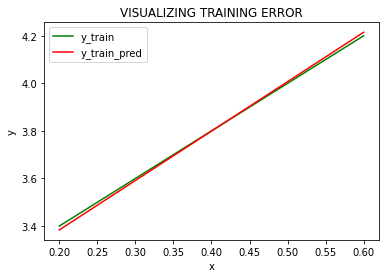

In [24]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

In [25]:
x_test

,x
3,0.8
4,1.0


In [29]:
y_test

,y
3,4.6
4,5.0


In [27]:
y_test_pred = []
for i in x_test['x']:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc.round(1))
y_test_pred

[4.6, 5.00000000000000]

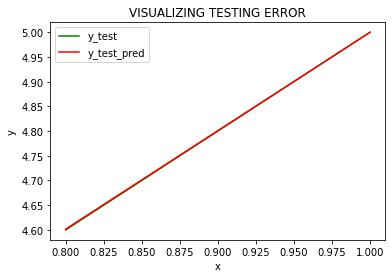

In [31]:
x_test_list = list(x_test['x'])
y_test_list = list(y_test['y'])
#Plot a line graph
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

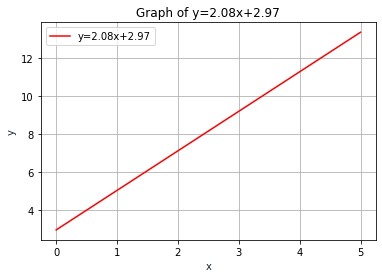

In [32]:
import matplotlib.pyplot as plt
import numpy as np
mi=mi.round(2)
ci=ci.round(2)
x = np.linspace(0,5,100)
y = mi*x+ci
plt.plot(x, y, '-r', label='y='+str(mi)+'x+'+str(ci))
plt.title('Graph of '+'y='+str(mi)+'x+'+str(ci))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [33]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.5
Predicted y value: 6.09
